<a href="https://colab.research.google.com/github/manelbenabid/ComponentTemp_C_Prediction/blob/main/ComponentTemp_C_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Analysis of Component Temperature ($ComponentTemp\_C$)

This notebook details the structured machine learning pipeline used to predict the dependent variable, $ComponentTemp\_C$. The workflow focuses on data preparation, dimensional reduction, and rigorous cross-validated model comparison.

## Methodology Steps

### 1. Data Prep & Exploratory Data Analysis

* Initial cleaning involved removing rows where the target variable ($ComponentTemp\_C$) was null.
* The data was partitioned into 70% training and 30% testing sets for development and final validation.
* Exploratory Data Analysis (EDA) was performed, including distribution plots and outlier treatment.
* Feature correlations were investigated, and categorical variables were successfully encoded.

### 2. Feature Selection

* All numerical features were standardized using `StandardScaler` to ensure consistent contribution during training.
* Lasso Regression, utilizing cross-validation, was applied for automated feature selection.
* This step reduced dimensionality, eliminated multicollinearity, and identified the most predictive features for model generalization.

### 3. Model Training and Cross-Validation

* A diverse set of regression models was trained and evaluated using **5-fold cross-validation (CV)** on the selected features:
    * Linear Regression
    * Polynomial Regression
    * Decision Tree Regressor
    * Random Forest Regressor
    * Support Vector Regressor (SVR)
    * K-Nearest Neighbors (KNN)

### 4. Final Model Selection and Interpretation

* The **Random Forest Regressor** demonstrated the best performance among all models tested.
* The final model was retrained on the entire training set.
* Predictions were made on the hold-out test set, and detailed interpretations of the results are provided.

## Data Prep & Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# importing the data
data = pd.read_csv("./data/interview_time_series.csv")
data.head()

,Timestamp,Track,Lap,Time_s,AmbientTemp_C,EngineSpeed_RPM,VehicleSpeed_kph,FuelLoad_kg,CoolingSetting,ERS_Deploy,...,Gear,Throttle_pct,BrakePressure_bar,OilPressure_bar,Weather_Humidity_pct,TyreWear_Index,SponsorLogoSize_cm,DriverMood_Score,EngineLoad_Index,RollingAmbient_C
0,01/06/2025 14:11,Silverstone,8,706,21.01,12027.0,177.5,17.33,med,0.0,...,8.0,96.8,51.2,4.81,64.0,33.8,30,6.0,1148.4,20.72
1,01/06/2025 14:11,Silverstone,8,698,20.73,12677.0,186.5,17.45,med,0.0,...,8.0,98.4,55.8,4.97,50.5,64.9,20,4.0,1300.8,21.28
2,01/06/2025 14:15,Silverstone,10,916,21.45,10047.0,149.8,14.11,med,1.0,...,8.0,86.2,77.2,4.52,57.7,51.1,20,1.0,875.8,21.47
3,01/06/2025 14:10,Silverstone,7,653,20.67,10709.0,148.2,18.15,med,0.0,...,8.0,84.3,76.5,4.66,55.1,63.4,20,7.0,935.0,20.75
4,01/06/2025 14:15,Silverstone,10,902,21.43,11452.0,175.3,14.62,med,0.0,...,8.0,84.0,66.7,4.63,65.2,64.0,10,4.0,900.6,21.54


In [ ]:
# dimensions of the dataset
data.shape

(1323, 22)

In [ ]:
# drilling into the datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             1323 non-null   object 
 1   Track                 1323 non-null   object 
 2   Lap                   1323 non-null   int64  
 3   Time_s                1323 non-null   int64  
 4   AmbientTemp_C         1290 non-null   float64
 5   EngineSpeed_RPM       1291 non-null   float64
 6   VehicleSpeed_kph      1295 non-null   float64
 7   FuelLoad_kg           1296 non-null   float64
 8   CoolingSetting        1302 non-null   object 
 9   ERS_Deploy            1287 non-null   float64
 10  AirflowRate_kgps      1301 non-null   float64
 11  ComponentTemp_C       1298 non-null   float64
 12  Gear                  1302 non-null   float64
 13  Throttle_pct          1295 non-null   float64
 14  BrakePressure_bar     1299 non-null   float64
 15  OilPressure_bar      

In [ ]:
# checking for missing values count in each column
data.isnull().sum()

,0
Timestamp,0
Track,0
Lap,0
Time_s,0
AmbientTemp_C,33
EngineSpeed_RPM,32
VehicleSpeed_kph,28
FuelLoad_kg,27
CoolingSetting,21
ERS_Deploy,36


In [ ]:
# exploring missing values in the target ComponentTemp_C
data[data['ComponentTemp_C'].isnull()].isnull().sum()

,0
Timestamp,0
Track,0
Lap,0
Time_s,0
AmbientTemp_C,1
EngineSpeed_RPM,2
VehicleSpeed_kph,0
FuelLoad_kg,0
CoolingSetting,1
ERS_Deploy,1


In [ ]:
# rows where the target value is null must be removed
# they should not be imputed as that can poison the model
# looking at the data, we can store it aside
# and use the model to predict the missing value (not for testing)
missing_target = data[data['ComponentTemp_C'].isnull()]

In [ ]:
# rows where the target is NOT missing
df = data.dropna(subset=['ComponentTemp_C'])
df = df.reset_index(drop=True)
print("dataset dimensions:", df.shape)
df.head()

dataset dimensions: (1298, 22)


,Timestamp,Track,Lap,Time_s,AmbientTemp_C,EngineSpeed_RPM,VehicleSpeed_kph,FuelLoad_kg,CoolingSetting,ERS_Deploy,...,Gear,Throttle_pct,BrakePressure_bar,OilPressure_bar,Weather_Humidity_pct,TyreWear_Index,SponsorLogoSize_cm,DriverMood_Score,EngineLoad_Index,RollingAmbient_C
0,01/06/2025 14:11,Silverstone,8,706,21.01,12027.0,177.5,17.33,med,0.0,...,8.0,96.8,51.2,4.81,64.0,33.8,30,6.0,1148.4,20.72
1,01/06/2025 14:11,Silverstone,8,698,20.73,12677.0,186.5,17.45,med,0.0,...,8.0,98.4,55.8,4.97,50.5,64.9,20,4.0,1300.8,21.28
2,01/06/2025 14:15,Silverstone,10,916,21.45,10047.0,149.8,14.11,med,1.0,...,8.0,86.2,77.2,4.52,57.7,51.1,20,1.0,875.8,21.47
3,01/06/2025 14:10,Silverstone,7,653,20.67,10709.0,148.2,18.15,med,0.0,...,8.0,84.3,76.5,4.66,55.1,63.4,20,7.0,935.0,20.75
4,01/06/2025 14:15,Silverstone,10,902,21.43,11452.0,175.3,14.62,med,0.0,...,8.0,84.0,66.7,4.63,65.2,64.0,10,4.0,900.6,21.54


In [ ]:
# checking for rows with max  missing values
null_count_per_row = df.isnull().sum(axis=1)
max(null_count_per_row) # if count is low then no need to remove any rows

3

In [1]:
# the data needs to be split into training and testing before moving on with
# feature exploration, imputing missing values, and feature exploration because
# we do not want to leak information from the test set to the training set,
# this will inflate performance

In [ ]:
# splitting the data into train-test
# remove timepstamp, track, and SponsorLogoSize_cm features because they are irrelevant to our model
from sklearn.model_selection import train_test_split
X = df.drop(['ComponentTemp_C', 'Timestamp', 'Track', 'SponsorLogoSize_cm'], axis=1)
y = df['ComponentTemp_C']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# exploring the values of the non-numeric features
X_train.CoolingSetting.unique()

array(['low', 'high', 'med', nan], dtype=object)

In [ ]:
X_train.Gear.describe()

,Gear
count,892.0
mean,8.0
std,0.0
min,8.0
25%,8.0
50%,8.0
75%,8.0
max,8.0


In [ ]:
int(X_train.Gear.isnull().sum())

16

In [ ]:
# since the gear has no variability, a single constant value cannot help the
# model discriminate between target outcomes
# the Gear column needs to be dropped
X_train = X_train.drop('Gear', axis=1)
X_test = X_test.drop('Gear', axis=1)

In [ ]:
# CoolingSetting has categorical values 'how', 'med', 'high'
# these values need to be encoded for use in our analysis
# ordinal encoding is best for this case since there is order between values
# but for now we just want to study the correlation so we will encode them
# when we imputed the null values
ordinal_map = {'low': 0, 'med': 1, 'high': 2}
train_encoded = X_train.copy()
train_encoded['CoolingSetting'] = train_encoded['CoolingSetting'].map(ordinal_map)

In [ ]:
# we explore correlations between the features
correlation_matrix = train_encoded.corr()

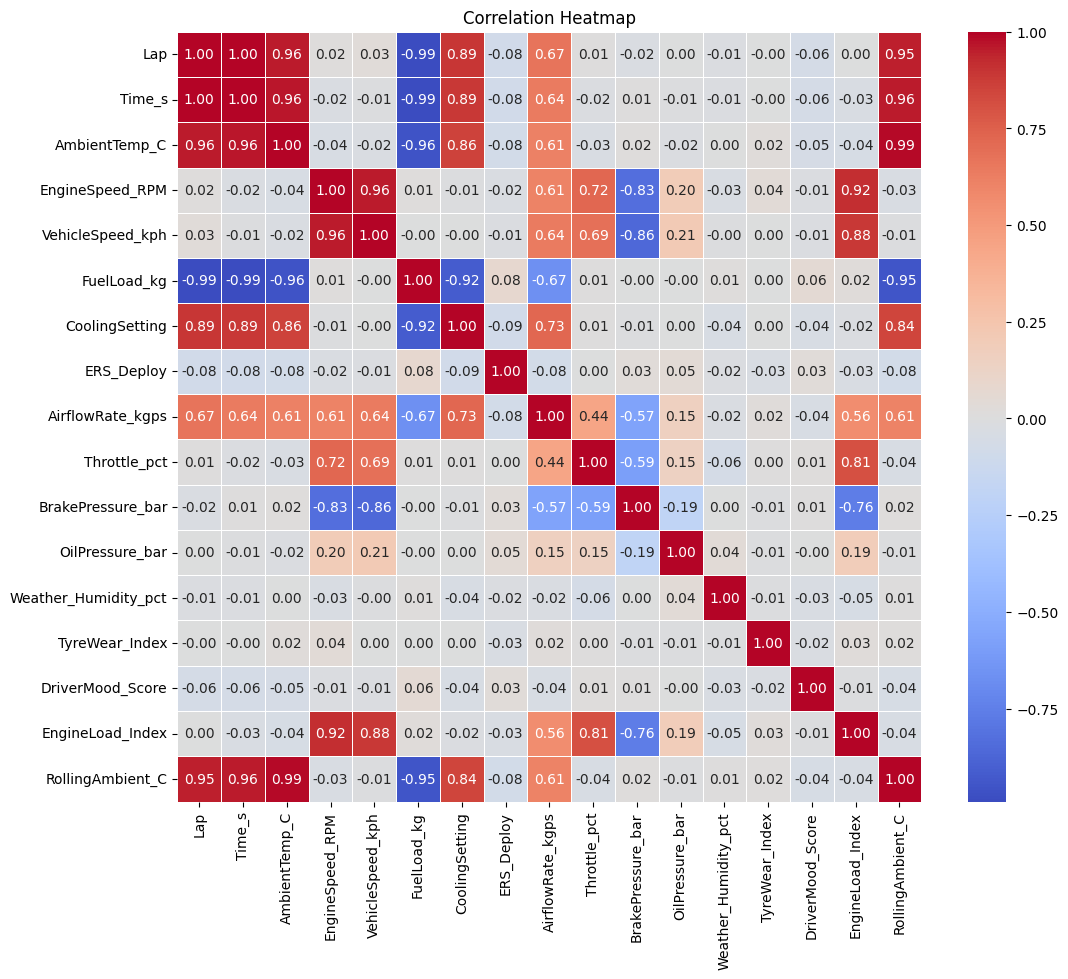

In [ ]:
# plotting a heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [2]:
# there are some highly correlated features such as:
# EngineSpeed_RPM and VerhicleSpeed_kph wth 96% correlation
# we will keep record of for feature selection

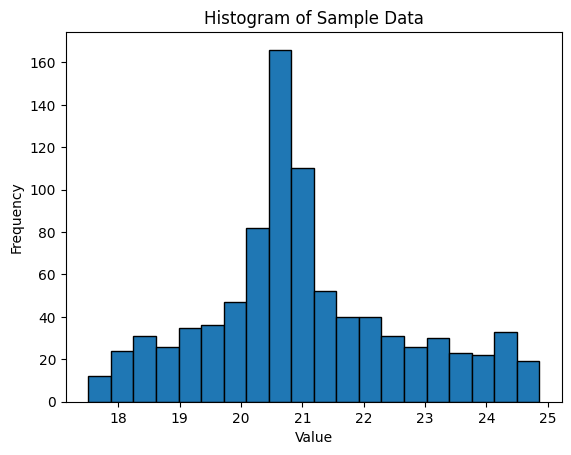

In [ ]:
# next thing, impute the null values
# AmbientTemp_C
# plot the feature distribution
plt.hist(X_train.AmbientTemp_C, bins=20, edgecolor='black')
plt.title("Histogram of Sample Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

<Axes: xlabel='AmbientTemp_C'>

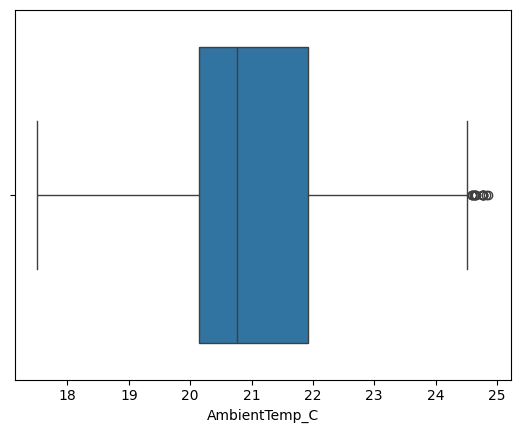

In [ ]:
sns.boxplot(x=X_train.AmbientTemp_C)

<Axes: xlabel='AmbientTemp_C'>

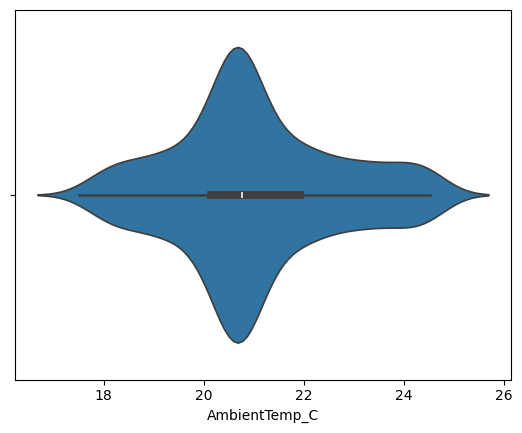

In [ ]:
sns.violinplot(x=X_train.AmbientTemp_C)

/tmp/ipython-input-4224957010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train.AmbientTemp_C)


<Axes: xlabel='AmbientTemp_C', ylabel='Density'>

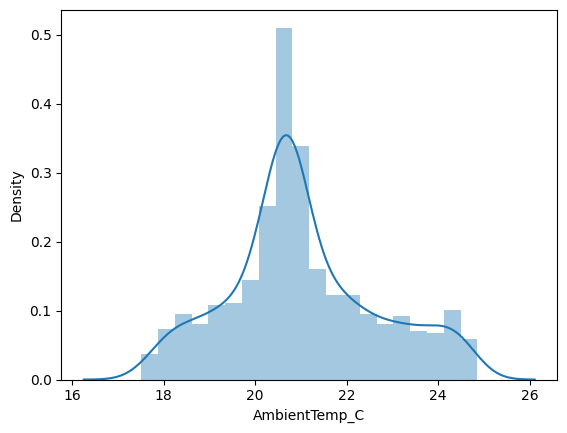

In [ ]:
sns.distplot(X_train.AmbientTemp_C)

In [ ]:
X_train.AmbientTemp_C.describe()

,AmbientTemp_C
count,885.000000
mean,21.021785
std,1.622522
min,17.510000
25%,20.150000
50%,20.770000
75%,21.920000
max,24.860000


<Axes: xlabel='Lap', ylabel='AmbientTemp_C'>

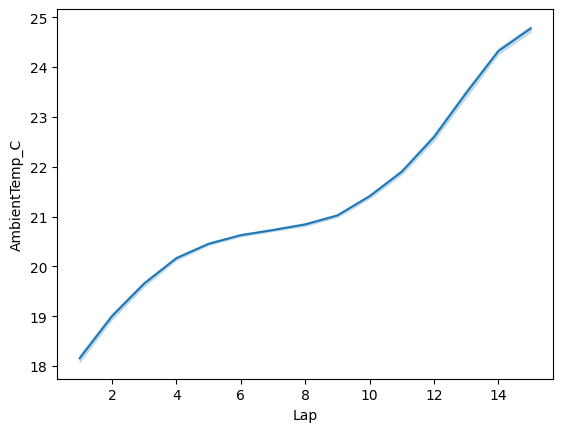

In [ ]:
sns.lineplot(x=X_train.Lap, y=X_train.AmbientTemp_C)

<Axes: xlabel='Time_s', ylabel='AmbientTemp_C'>

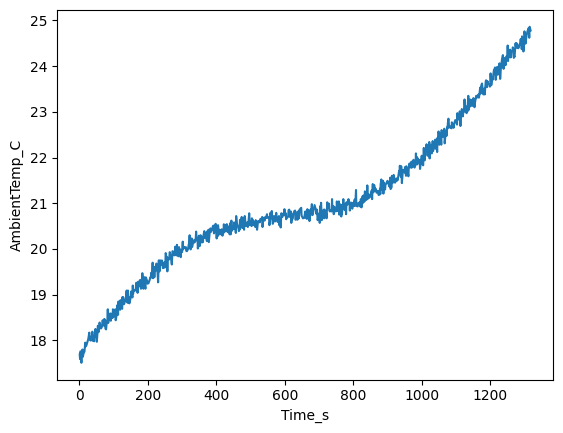

In [ ]:
sns.lineplot(x=X_train.Time_s, y=X_train.AmbientTemp_C)

In [ ]:
X_train.AmbientTemp_C

,AmbientTemp_C
598,20.42
828,20.17
924,20.70
553,23.92
415,20.86
...,...
1095,20.04
1130,20.33
1294,23.12
860,18.69


In [ ]:
# observing AmbientTemp_C
# we could impute the null values using forward and backward fill
# X_train['AmbientTemp_C'] = X_train['AmbientTemp_C'].ffill().bfill()
# but since the data has been split, time intervals have been distorted
# so it is no longer valid
# instead, since there are no outliers, fill in with the mean
AmbientTemp_C_mean = X_train.AmbientTemp_C.mean()
X_train['AmbientTemp_C'] = X_train['AmbientTemp_C'].fillna(AmbientTemp_C_mean)
X_test['AmbientTemp_C'] = X_test['AmbientTemp_C'].fillna(AmbientTemp_C_mean)

/tmp/ipython-input-3317202079.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train.AmbientTemp_C)


<Axes: ylabel='Density'>

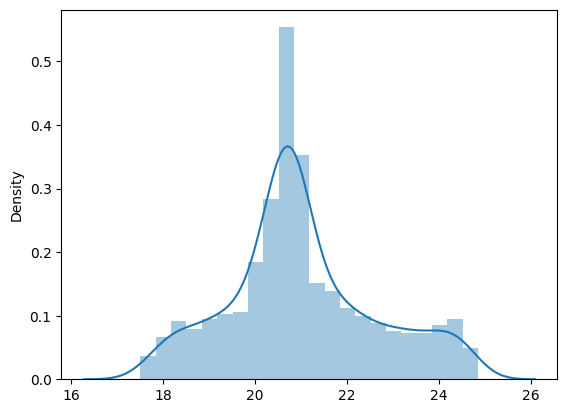

In [ ]:
# checking the distribution after imputing the data
sns.distplot(x=X_train.AmbientTemp_C)

<Axes: xlabel='Lap', ylabel='AmbientTemp_C'>

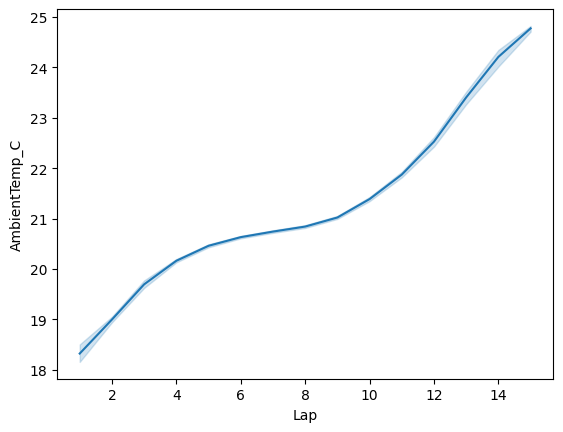

In [ ]:
sns.lineplot(x=X_train.Lap, y=X_train.AmbientTemp_C)

In [ ]:
X_train.AmbientTemp_C.describe()

,AmbientTemp_C
count,908.000000
mean,21.021785
std,1.601818
min,17.510000
25%,20.170000
50%,20.785000
75%,21.862500
max,24.860000


In [ ]:
# EngineSpeed_RPM
print("# null values: ", int(X_train.EngineSpeed_RPM.isnull().sum()))
X_train.EngineSpeed_RPM.describe()

# null values:  20


,EngineSpeed_RPM
count,888.000000
mean,11268.164414
std,1111.340175
min,9377.000000
25%,10245.500000
50%,11290.500000
75%,12282.000000
max,13137.000000


<Axes: xlabel='Lap', ylabel='EngineSpeed_RPM'>

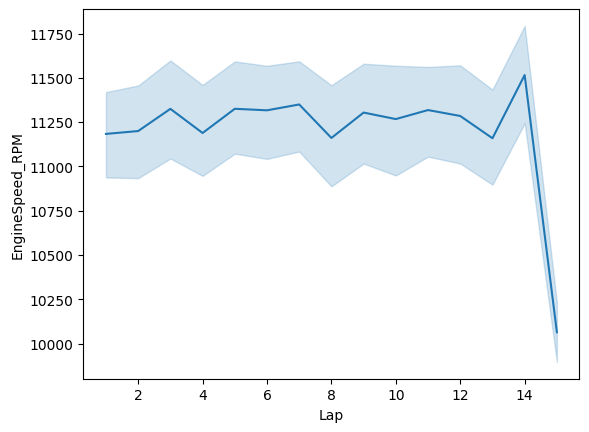

In [ ]:
sns.lineplot(x=X_train.Lap, y=X_train.EngineSpeed_RPM)

<Axes: xlabel='Time_s', ylabel='EngineSpeed_RPM'>

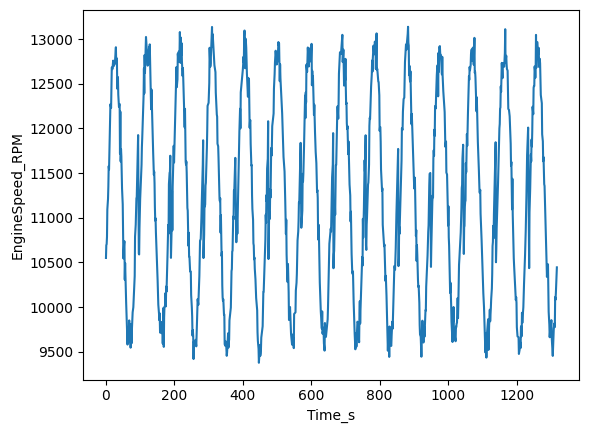

In [ ]:
sns.lineplot(x=X_train.Time_s, y=X_train.EngineSpeed_RPM)

/tmp/ipython-input-1930652075.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train.EngineSpeed_RPM)


<Axes: ylabel='Density'>

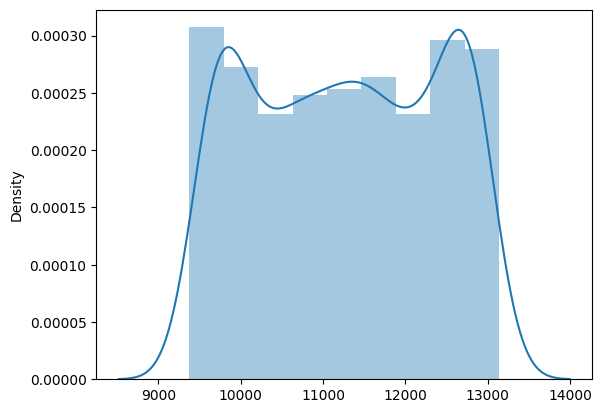

In [ ]:
sns.distplot(x=X_train.EngineSpeed_RPM)

In [ ]:
# the pattern is fluctuating so the best option would be to fill the values with the mean
EngineSpeed_RPM_mean = X_train.EngineSpeed_RPM.mean()

In [ ]:
EngineSpeed_RPM_mean

np.float64(11268.164414414414)

In [ ]:
#fill both the X_train and X_test with the mean value of X_train
X_train['EngineSpeed_RPM'] = X_train.EngineSpeed_RPM.fillna(EngineSpeed_RPM_mean)
X_test['EngineSpeed_RPM'] = X_test.EngineSpeed_RPM.fillna(EngineSpeed_RPM_mean)

In [ ]:
X_train['EngineSpeed_RPM']

,EngineSpeed_RPM
598,11681.0
828,9707.0
924,12080.0
553,9607.0
415,9667.0
...,...
1095,11360.0
1130,12429.0
1294,10880.0
860,12832.0


In [ ]:
# VehicleSpeed_kph
X_train.columns

Index(['Lap', 'Time_s', 'AmbientTemp_C', 'EngineSpeed_RPM', 'VehicleSpeed_kph',
       'FuelLoad_kg', 'CoolingSetting', 'ERS_Deploy', 'AirflowRate_kgps',
       'Throttle_pct', 'BrakePressure_bar', 'OilPressure_bar',
       'Weather_Humidity_pct', 'TyreWear_Index', 'DriverMood_Score',
       'EngineLoad_Index', 'RollingAmbient_C'],
      dtype='object')

/tmp/ipython-input-2192335723.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train.VehicleSpeed_kph)


<Axes: ylabel='Density'>

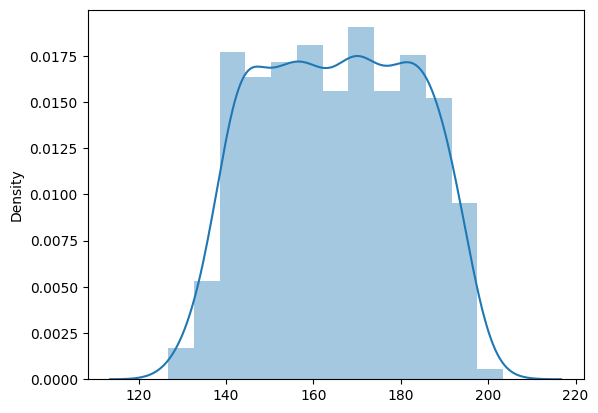

In [ ]:
sns.distplot(x=X_train.VehicleSpeed_kph)

<Axes: xlabel='Lap', ylabel='VehicleSpeed_kph'>

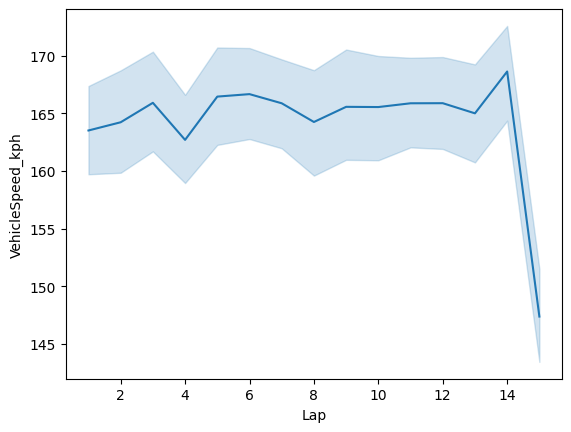

In [ ]:
sns.lineplot(x=X_train.Lap, y=X_train.VehicleSpeed_kph)

In [ ]:
X_train.VehicleSpeed_kph.describe()

,VehicleSpeed_kph
count,890.000000
mean,165.266292
std,17.186772
min,126.700000
25%,150.700000
50%,165.800000
75%,180.000000
max,203.400000


In [ ]:
# fill the null values with the mean since there are no outliers
VehicleSpeed_kph_mean = X_train.VehicleSpeed_kph.mean()
X_train['VehicleSpeed_kph'] = X_train.VehicleSpeed_kph.fillna(VehicleSpeed_kph_mean)
X_test['VehicleSpeed_kph'] = X_test.VehicleSpeed_kph.fillna(VehicleSpeed_kph_mean)

In [ ]:
X_train.isnull().sum()

,0
Lap,0
Time_s,0
AmbientTemp_C,0
EngineSpeed_RPM,0
VehicleSpeed_kph,0
FuelLoad_kg,19
CoolingSetting,13
ERS_Deploy,29
AirflowRate_kgps,13
Throttle_pct,19


/tmp/ipython-input-1302177703.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train.FuelLoad_kg)


<Axes: ylabel='Density'>

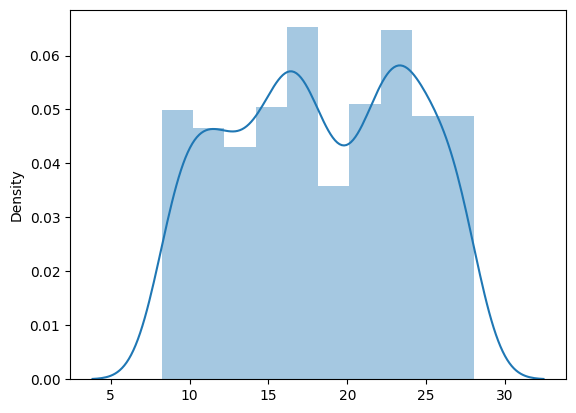

In [ ]:
sns.distplot(x=X_train.FuelLoad_kg)

In [ ]:
X_train.FuelLoad_kg.describe()

,FuelLoad_kg
count,889.000000
mean,18.289753
std,5.685477
min,8.230000
25%,13.580000
50%,18.030000
75%,23.270000
max,28.060000


<Axes: xlabel='Lap', ylabel='FuelLoad_kg'>

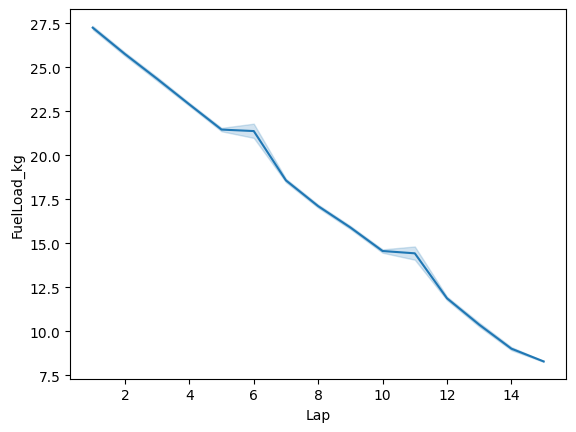

In [ ]:
sns.lineplot(x=X_train.Lap, y=X_train.FuelLoad_kg)

In [ ]:
# there is a downright trend to fuel load
# since f1 cars do not refuel during a race
# it would be more accurate to apply forwardfill
# but the data is already split, so we fill values with the mean
FuelLoad_kg_mean = X_train.FuelLoad_kg.mean()
X_train['FuelLoad_kg'] = X_train['FuelLoad_kg'].fillna(FuelLoad_kg_mean)
X_test['FuelLoad_kg'] = X_test['FuelLoad_kg'].fillna(FuelLoad_kg_mean)

<Axes: xlabel='Lap', ylabel='FuelLoad_kg'>

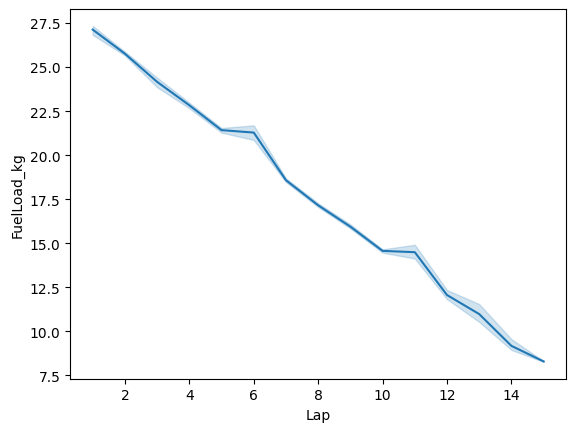

In [ ]:
sns.lineplot(x=X_train.Lap, y=X_train.FuelLoad_kg)

In [ ]:
X_train.FuelLoad_kg.describe()

,FuelLoad_kg
count,908.000000
mean,18.289753
std,5.625611
min,8.230000
25%,13.715000
50%,18.289753
75%,23.207500
max,28.060000


/tmp/ipython-input-1302177703.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train.FuelLoad_kg)


<Axes: ylabel='Density'>

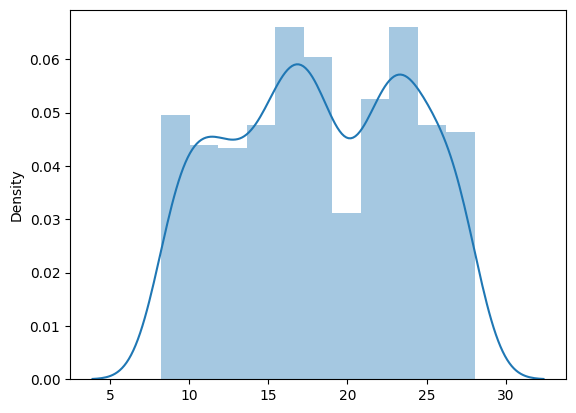

In [ ]:
sns.distplot(x=X_train.FuelLoad_kg)

In [ ]:
# CoolingSetting
# since this feature is categorical
# the best method is to fill with the mode
CoolingSetting_mode = X_train.CoolingSetting.mode()[0]
X_train['CoolingSetting'] = X_train['CoolingSetting'].fillna(CoolingSetting_mode)
X_test['CoolingSetting'] = X_test['CoolingSetting'].fillna(CoolingSetting_mode)

In [ ]:
# ERS_Deploy
X_train.ERS_Deploy.describe()

,ERS_Deploy
count,879.000000
mean,0.296928
std,0.457165
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
# fill null values with mode
ERS_Deploy_mode = X_train.ERS_Deploy.mode()[0]
X_train['ERS_Deploy'] = X_train['ERS_Deploy'].fillna(ERS_Deploy_mode)
X_test['ERS_Deploy'] = X_test['ERS_Deploy'].fillna(ERS_Deploy_mode)

In [ ]:
# we can investigate further to see if the value of ERS_Deploy can be
# deducted from relevant features
features = ['Throttle_pct', 'BrakePressure_bar', 'EngineSpeed_RPM',
            'VehicleSpeed_kph', 'EngineLoad_Index', 'ERS_Deploy']

In [ ]:
X_train[features]

,Throttle_pct,BrakePressure_bar,EngineSpeed_RPM,VehicleSpeed_kph,EngineLoad_Index,ERS_Deploy
598,94.8,71.3,11681.0,170.200000,1213.5,0.0
828,81.4,64.3,9707.0,146.200000,805.9,0.0
924,90.1,61.6,12080.0,173.400000,1080.1,0.0
553,81.9,83.0,9607.0,148.000000,739.5,0.0
415,70.2,77.0,9667.0,137.800000,785.0,0.0
...,...,...,...,...,...,...
1095,89.2,69.2,11360.0,162.900000,982.9,1.0
1130,85.5,67.3,12429.0,165.266292,987.1,0.0
1294,69.4,73.9,10880.0,158.000000,762.5,0.0
860,100.0,48.9,12832.0,191.700000,1303.3,1.0


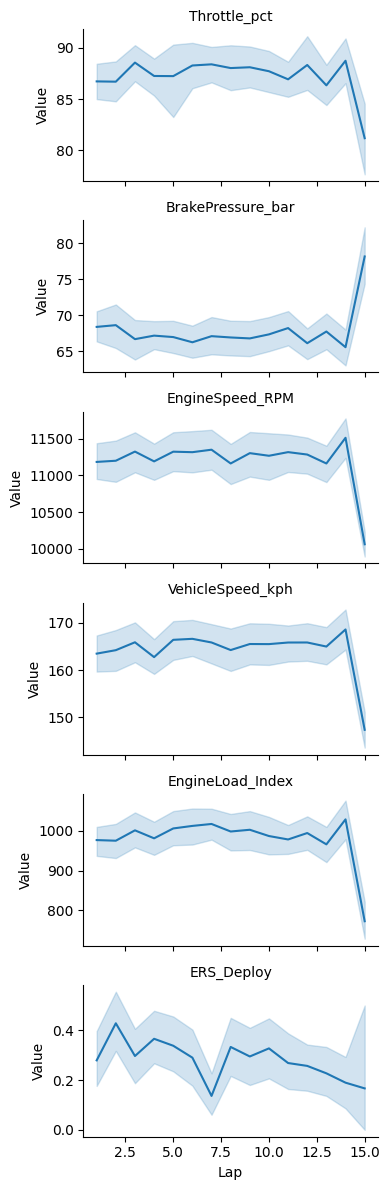

In [ ]:
# Melt the DataFrame to long format
df_long = X_train.melt(id_vars="Lap", value_vars=features,
                       var_name="Feature", value_name="Value")

# Create one plot per feature, stacked vertically
g = sns.FacetGrid(df_long, row="Feature", sharex=True, sharey=False, height=2, aspect=2)
g.map(sns.lineplot, "Lap", "Value")

g.set_axis_labels("Lap", "Value")
g.set_titles("{row_name}")
plt.tight_layout()
plt.show()

In [ ]:
# it does not seem to be any correlation so we can replace with mode
ERS_Deploy_mode = X_train.ERS_Deploy.mode()[0]
X_train['ERS_Deploy'] = X_train['ERS_Deploy'].fillna(ERS_Deploy_mode)
X_test['ERS_Deploy'] = X_test['ERS_Deploy'].fillna(ERS_Deploy_mode)

In [ ]:
X_train.isnull().sum()

,0
Lap,0
Time_s,0
AmbientTemp_C,0
EngineSpeed_RPM,0
VehicleSpeed_kph,0
FuelLoad_kg,0
CoolingSetting,0
ERS_Deploy,0
AirflowRate_kgps,13
Throttle_pct,19


In [ ]:
X_train.AirflowRate_kgps

,AirflowRate_kgps
598,0.779
828,0.671
924,0.779
553,0.880
415,0.661
...,...
1095,0.757
1130,0.794
1294,0.944
860,0.864


<Axes: xlabel='Lap', ylabel='AirflowRate_kgps'>

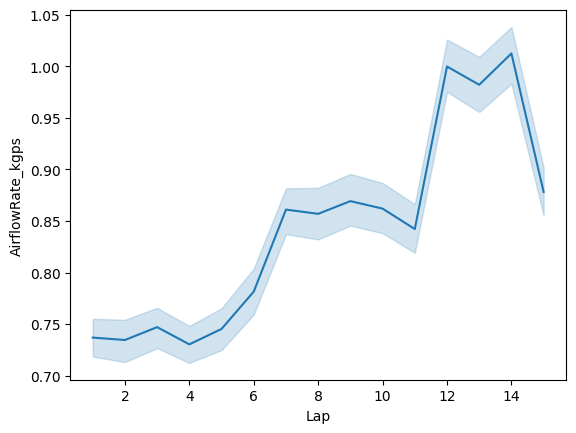

In [ ]:
sns.lineplot(x=X_train.Lap, y=X_train.AirflowRate_kgps)

/tmp/ipython-input-3183583345.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train.AirflowRate_kgps)


<Axes: ylabel='Density'>

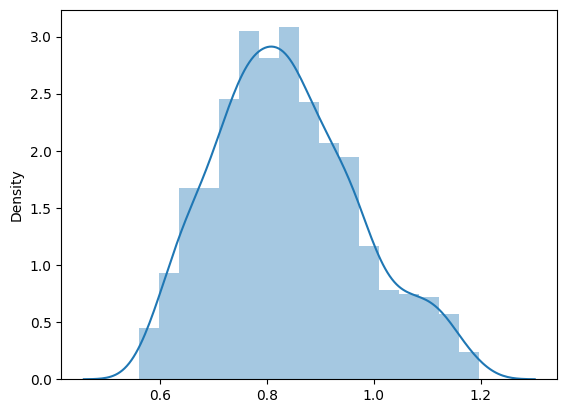

In [ ]:
sns.distplot(x=X_train.AirflowRate_kgps)

In [ ]:
X_train.AirflowRate_kgps.describe()

,AirflowRate_kgps
count,895.000000
mean,0.838193
std,0.134484
min,0.562000
25%,0.742000
50%,0.829000
75%,0.925500
max,1.197000


In [ ]:
# replace with the mean since it has a normal distribution
AirflowRate_kgps_mean = X_train.AirflowRate_kgps.mean()
X_train['AirflowRate_kgps'] = X_train['AirflowRate_kgps'].fillna(AirflowRate_kgps_mean)
X_test['AirflowRate_kgps'] = X_test['AirflowRate_kgps'].fillna(AirflowRate_kgps_mean)

<Axes: xlabel='Lap', ylabel='Throttle_pct'>

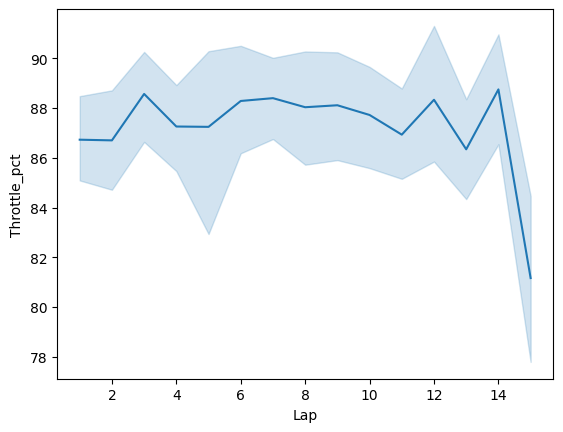

In [ ]:
# Throttle_pct
sns.lineplot(x=X_train.Lap, y=X_train.Throttle_pct)

/tmp/ipython-input-1329123600.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train.Throttle_pct)


<Axes: ylabel='Density'>

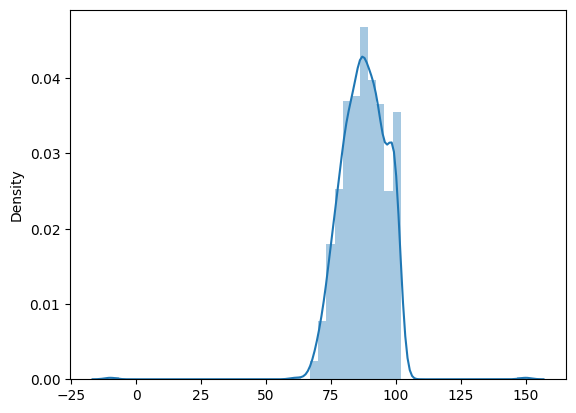

In [ ]:
sns.distplot(x=X_train.Throttle_pct)

In [ ]:
X_train.Throttle_pct.describe()

,Throttle_pct
count,889.000000
mean,87.606524
std,8.907671
min,-10.000000
25%,81.500000
50%,87.600000
75%,93.800000
max,150.000000


In [ ]:
mask = X_train.Throttle_pct < 0
X_train[mask]

,Lap,Time_s,AmbientTemp_C,EngineSpeed_RPM,VehicleSpeed_kph,FuelLoad_kg,CoolingSetting,ERS_Deploy,AirflowRate_kgps,Throttle_pct,BrakePressure_bar,OilPressure_bar,Weather_Humidity_pct,TyreWear_Index,DriverMood_Score,EngineLoad_Index,RollingAmbient_C
505,5,416,20.43,12565.0,185.9,21.78,low,0.0,0.89,-10.0,54.1,5.02,61.4,43.8,NaN,1220.9,NaN


In [ ]:
X_train.shape

(908, 17)

In [ ]:
# remove the row from X_train
X_train = X_train.drop(X_train[mask].index)
X_train = X_train.reset_index(drop=True)

# remove the same rows from y_train using the same mask
y_train = y_train.drop(y_train[mask].index)
y_train = y_train.reset_index(drop=True)
X_train.shape

(907, 17)

In [ ]:
X_train.Throttle_pct.describe()

,Throttle_pct
count,888.000000
mean,87.716441
std,8.287534
min,61.500000
25%,81.575000
50%,87.650000
75%,93.800000
max,150.000000


In [ ]:
mask2 = X_train.Throttle_pct >100
X_train[mask2]

,Lap,Time_s,AmbientTemp_C,EngineSpeed_RPM,VehicleSpeed_kph,FuelLoad_kg,CoolingSetting,ERS_Deploy,AirflowRate_kgps,Throttle_pct,BrakePressure_bar,OilPressure_bar,Weather_Humidity_pct,TyreWear_Index,DriverMood_Score,EngineLoad_Index,RollingAmbient_C
693,12,1073,22.51,12905.0,189.6,11.86,high,1.0,1.14,150.0,51.7,5.04,54.6,39.1,7.0,1314.0,22.47


In [ ]:
# remove the rows from X_train
X_train = X_train.drop(X_train[mask2].index)
X_train = X_train.reset_index(drop=True)
# Remove the same rows from y_train using the same mask
y_train = y_train.drop(y_train[mask2].index)
y_train = y_train.reset_index(drop=True)
X_train.shape

(906, 17)

In [ ]:
X_train.Throttle_pct.describe()

,Throttle_pct
count,887.000000
mean,87.646223
std,8.023555
min,61.500000
25%,81.550000
50%,87.600000
75%,93.800000
max,100.000000


/tmp/ipython-input-1329123600.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train.Throttle_pct)


<Axes: ylabel='Density'>

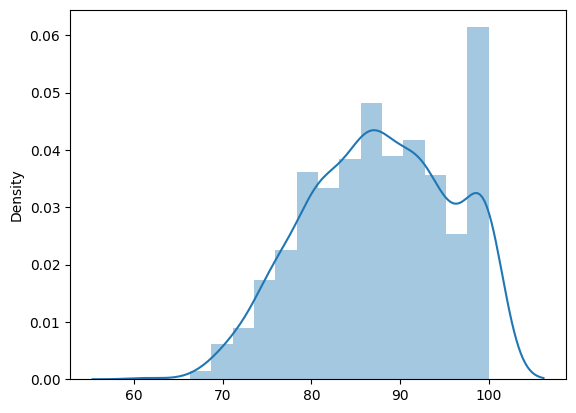

In [ ]:
sns.distplot(x=X_train.Throttle_pct)

In [ ]:
# now that we removed the outliers: throttle <0 and throttle >100
# we can fill the missing values with the column mean
Throttle_pct_mean = X_train.Throttle_pct.mean()
X_train['Throttle_pct'] = X_train['Throttle_pct'].fillna(Throttle_pct_mean)
X_test['Throttle_pct'] = X_test['Throttle_pct'].fillna(Throttle_pct_mean)

In [ ]:
X_train.isnull().sum()

,0
Lap,0
Time_s,0
AmbientTemp_C,0
EngineSpeed_RPM,0
VehicleSpeed_kph,0
FuelLoad_kg,0
CoolingSetting,0
ERS_Deploy,0
AirflowRate_kgps,0
Throttle_pct,0


In [ ]:
# BrakePressure_bar
X_train.BrakePressure_bar.describe()

,BrakePressure_bar
count,889.000000
mean,67.238808
std,9.928206
min,44.300000
25%,59.800000
50%,67.300000
75%,74.700000
max,92.400000


<Axes: xlabel='Lap', ylabel='BrakePressure_bar'>

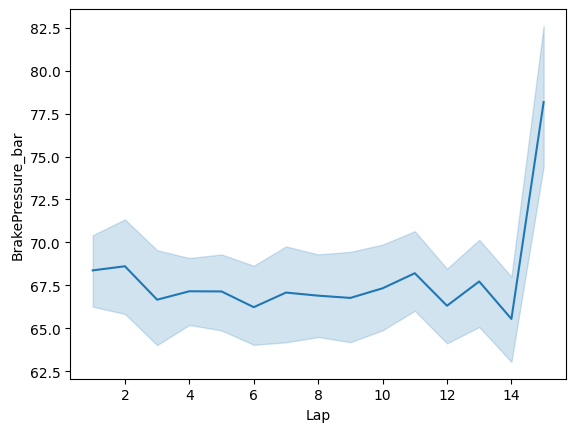

In [ ]:
sns.lineplot(x=X_train.Lap, y=X_train.BrakePressure_bar)

/tmp/ipython-input-2037970921.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train.BrakePressure_bar)


<Axes: ylabel='Density'>

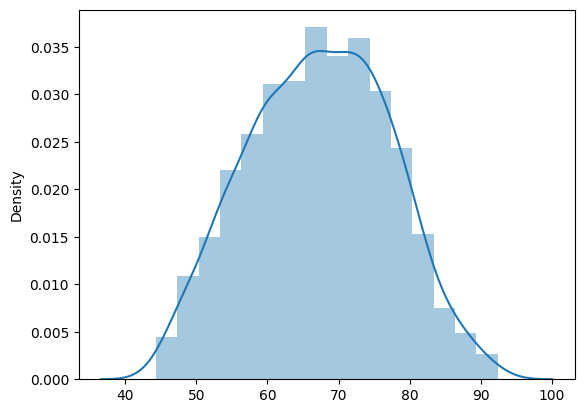

In [ ]:
sns.distplot(x=X_train.BrakePressure_bar)

In [ ]:
# BrakePressure_bar forms a normal distribution with no outliers
# missing values can be replaced with the mean
BrakePressure_bar_mean = X_train.BrakePressure_bar.mean()
X_train['BrakePressure_bar'] = X_train['BrakePressure_bar'].fillna(BrakePressure_bar_mean)
X_test['BrakePressure_bar'] = X_test['BrakePressure_bar'].fillna(BrakePressure_bar_mean)

In [ ]:
X_train.isnull().sum()

,0
Lap,0
Time_s,0
AmbientTemp_C,0
EngineSpeed_RPM,0
VehicleSpeed_kph,0
FuelLoad_kg,0
CoolingSetting,0
ERS_Deploy,0
AirflowRate_kgps,0
Throttle_pct,0


In [ ]:
# OilPressure_bar
X_train.OilPressure_bar.describe()

,OilPressure_bar
count,882.000000
mean,4.793073
std,1.551562
min,0.000000
25%,4.550000
50%,4.740000
75%,4.950000
max,50.000000


<Axes: xlabel='Lap', ylabel='OilPressure_bar'>

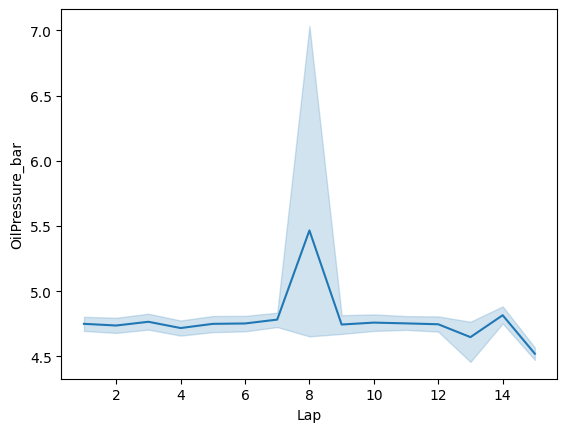

In [ ]:
sns.lineplot(x=X_train.Lap, y=X_train.OilPressure_bar)

/tmp/ipython-input-1903495213.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train.OilPressure_bar)


<Axes: ylabel='Density'>

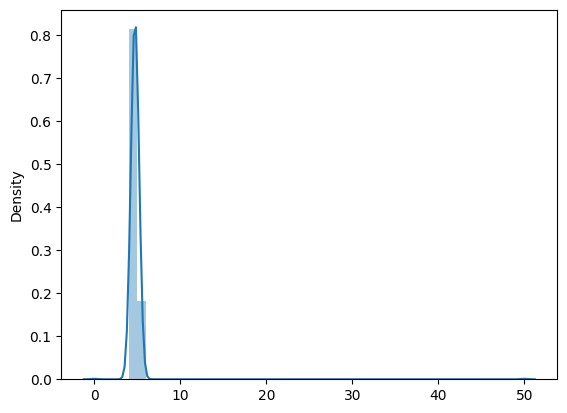

In [ ]:
sns.distplot(x=X_train.OilPressure_bar)

In [ ]:
## checking for outliers using the mean +/- 3 stddev method

In [ ]:
# very high values
mask = X_train.OilPressure_bar > X_train.OilPressure_bar.mean() + 3 * X_train.OilPressure_bar.std()
X_train[mask]

,Lap,Time_s,AmbientTemp_C,EngineSpeed_RPM,VehicleSpeed_kph,FuelLoad_kg,CoolingSetting,ERS_Deploy,AirflowRate_kgps,Throttle_pct,BrakePressure_bar,OilPressure_bar,Weather_Humidity_pct,TyreWear_Index,DriverMood_Score,EngineLoad_Index,RollingAmbient_C
197,8,691,20.85,13047.0,203.4,17.56,med,1.0,1.106,100.0,45.9,50.0,68.1,45.6,5.0,1281.4,21.01


In [ ]:
# very low values
mask2 = X_train.OilPressure_bar < X_train.OilPressure_bar.mean() - 3 * X_train.OilPressure_bar.std()
X_train[mask2]

,Lap,Time_s,AmbientTemp_C,EngineSpeed_RPM,VehicleSpeed_kph,FuelLoad_kg,CoolingSetting,ERS_Deploy,AirflowRate_kgps,Throttle_pct,BrakePressure_bar,OilPressure_bar,Weather_Humidity_pct,TyreWear_Index,DriverMood_Score,EngineLoad_Index,RollingAmbient_C
649,13,1225,23.95,10583.0,161.4,18.289753,high,0.0,0.925,87.7,66.6,0.0,68.2,37.4,9.0,916.5,23.95


In [ ]:
# If oil pressure reads 0 bar while throttle is at 87%, you’re looking at
# faulty data, sensor failure, or telemetry misalignment,
# not an actual physical event.
# on the other hand
# 50 bar is not physically realistic for any F1 engine
# hence, we conclude that these two values are sensor/telemetry issues
# i.e. outliers, and we remove them from our dataset
X_train = X_train.drop(X_train[mask].index)
X_train = X_train.drop(X_train[mask2].index)
X_train = X_train.reset_index(drop=True)

# Remove the same rows from y_train using the same mask
y_train = y_train.drop(y_train[mask].index)
y_train = y_train.drop(y_train[mask2].index)
y_train = y_train.reset_index(drop=True)

/tmp/ipython-input-213542276.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_train = X_train.drop(X_train[mask2].index)


/tmp/ipython-input-1903495213.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train.OilPressure_bar)


<Axes: ylabel='Density'>

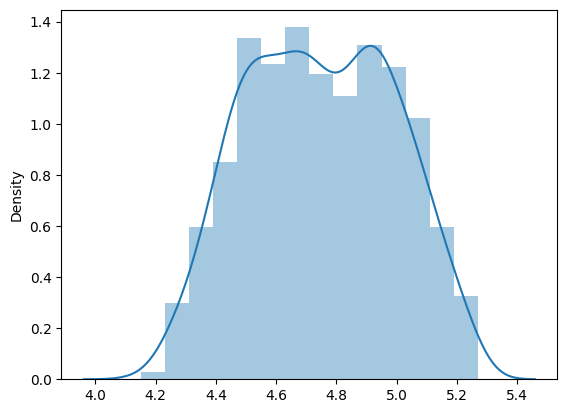

In [ ]:
sns.distplot(x=X_train.OilPressure_bar)

In [ ]:
X_train.OilPressure_bar.describe()

,OilPressure_bar
count,880.000000
mean,4.747148
std,0.244097
min,4.150000
25%,4.550000
50%,4.740000
75%,4.950000
max,5.270000


In [ ]:
# our data looks much better now
# we can proceed with filling null values with the mean
OilPressure_bar_mean = X_train.OilPressure_bar.mean()
X_train['OilPressure_bar'] = X_train['OilPressure_bar'].fillna(OilPressure_bar_mean)
X_test['OilPressure_bar'] = X_test['OilPressure_bar'].fillna(OilPressure_bar_mean)

<Axes: xlabel='Lap', ylabel='Weather_Humidity_pct'>

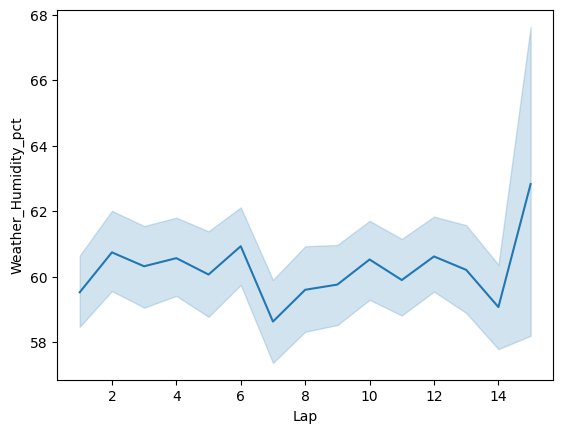

In [ ]:
# Weather_Humidity_pct
sns.lineplot(x=X_train.Lap, y=X_train.Weather_Humidity_pct)

/tmp/ipython-input-1406700632.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train.Weather_Humidity_pct)


<Axes: ylabel='Density'>

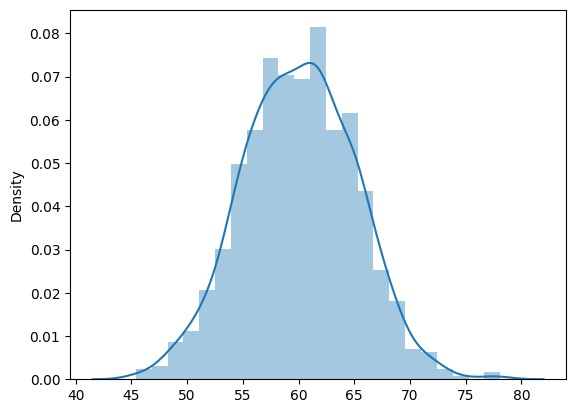

In [ ]:
sns.distplot(x=X_train.Weather_Humidity_pct)

In [ ]:
X_train.Weather_Humidity_pct.describe()

,Weather_Humidity_pct
count,890.000000
mean,60.059888
std,5.033074
min,45.400000
25%,56.500000
50%,60.100000
75%,63.600000
max,78.100000


In [ ]:
# investigate any outliers
# very low values
mask3 = X_train.Weather_Humidity_pct < X_train.Weather_Humidity_pct.mean() - 3 * X_train.Weather_Humidity_pct.std()
X_train[mask3]

,Lap,Time_s,AmbientTemp_C,EngineSpeed_RPM,VehicleSpeed_kph,FuelLoad_kg,CoolingSetting,ERS_Deploy,AirflowRate_kgps,Throttle_pct,BrakePressure_bar,OilPressure_bar,Weather_Humidity_pct,TyreWear_Index,DriverMood_Score,EngineLoad_Index,RollingAmbient_C


In [ ]:
# very high values
mask4 = X_train.Weather_Humidity_pct > X_train.Weather_Humidity_pct.mean() + 3 * X_train.Weather_Humidity_pct.std()
X_train[mask4]

,Lap,Time_s,AmbientTemp_C,EngineSpeed_RPM,VehicleSpeed_kph,FuelLoad_kg,CoolingSetting,ERS_Deploy,AirflowRate_kgps,Throttle_pct,BrakePressure_bar,OilPressure_bar,Weather_Humidity_pct,TyreWear_Index,DriverMood_Score,EngineLoad_Index,RollingAmbient_C
386,4,303,19.99,12902.0,192.2,23.42,low,1.0,0.853,99.6,55.200000,5.08,77.2,37.5,9.0,1301.4,19.73
655,13,1171,23.53,12722.0,185.8,10.42,high,0.0,1.089,92.2,67.238808,4.92,78.1,53.9,8.0,1153.3,23.60


In [ ]:
# since our data has outliers
# but they do not seem to be sensor misreadings
# null values are better be filled with the median
Weather_Humidity_pct_median = X_train['Weather_Humidity_pct'].median()
X_train['Weather_Humidity_pct'] = X_train['Weather_Humidity_pct'].fillna(Weather_Humidity_pct_median)
X_test['Weather_Humidity_pct'] = X_test['Weather_Humidity_pct'].fillna(Weather_Humidity_pct_median)

/tmp/ipython-input-1406700632.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train.Weather_Humidity_pct)


<Axes: ylabel='Density'>

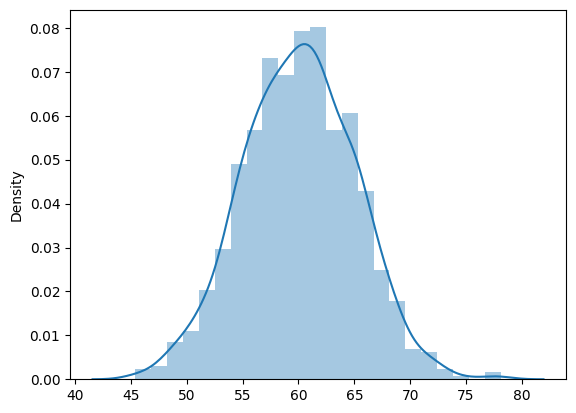

In [ ]:
sns.distplot(x=X_train.Weather_Humidity_pct)

In [ ]:
X_train.Weather_Humidity_pct.describe()

,Weather_Humidity_pct
count,904.000000
mean,60.060509
std,4.993908
min,45.400000
25%,56.600000
50%,60.100000
75%,63.600000
max,78.100000


<Axes: xlabel='Lap', ylabel='TyreWear_Index'>

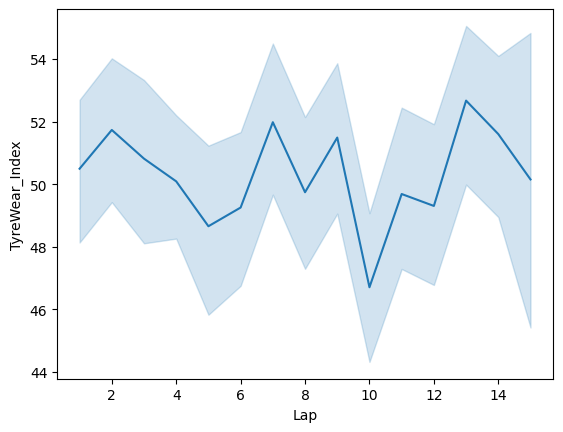

In [ ]:
# TyreWear_Index
sns.lineplot(x=X_train.Lap, y=X_train.TyreWear_Index)

/tmp/ipython-input-2490667664.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train.TyreWear_Index)


<Axes: ylabel='Density'>

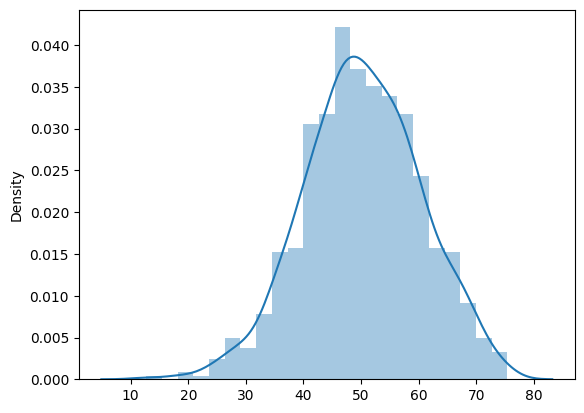

In [ ]:
sns.distplot(x=X_train.TyreWear_Index)

In [ ]:
X_train.TyreWear_Index.describe()

,TyreWear_Index
count,888.000000
mean,50.301914
std,10.106678
min,12.700000
25%,43.600000
50%,50.200000
75%,57.225000
max,75.400000


In [ ]:
# the data has a normal distribution
# fill null values with the mean
TyreWear_Index_mean = X_train.TyreWear_Index.mean()
X_train['TyreWear_Index'] = X_train['TyreWear_Index'].fillna(TyreWear_Index_mean)
X_test['TyreWear_Index'] = X_test['TyreWear_Index'].fillna(TyreWear_Index_mean)

/tmp/ipython-input-2490667664.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train.TyreWear_Index)


<Axes: ylabel='Density'>

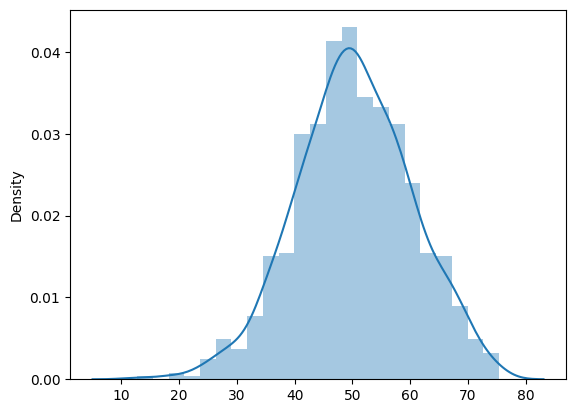

In [ ]:
sns.distplot(x=X_train.TyreWear_Index)

<Axes: xlabel='Lap', ylabel='DriverMood_Score'>

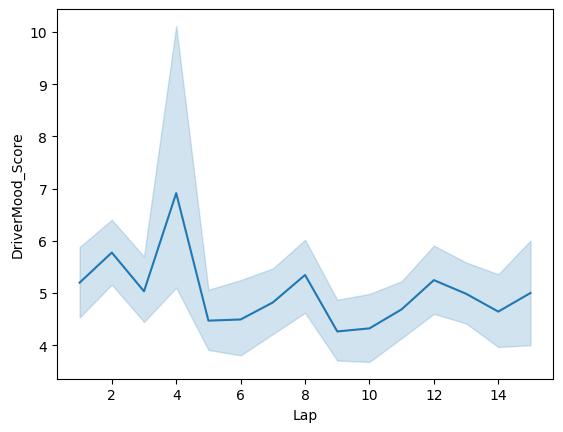

In [ ]:
# DriverMood_Score
sns.lineplot(x=X_train.Lap, y=X_train.DriverMood_Score)

In [ ]:
X_train.DriverMood_Score.describe()

,DriverMood_Score
count,887.000000
mean,5.031567
std,4.127362
min,-5.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,100.000000


/tmp/ipython-input-482304798.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train.DriverMood_Score)


<Axes: ylabel='Density'>

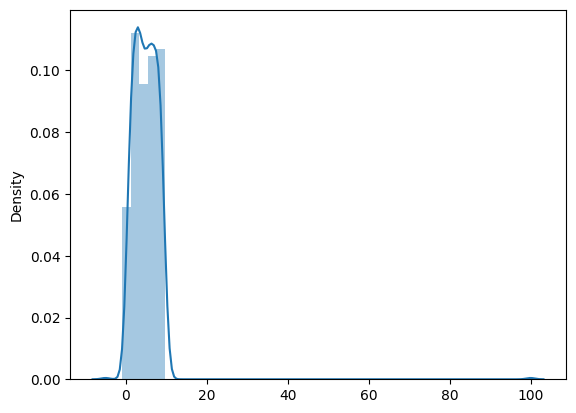

In [ ]:
sns.distplot(x=X_train.DriverMood_Score)

In [ ]:
# investigate outliers
# very high values
mask4 = X_train.DriverMood_Score > X_train.DriverMood_Score.mean() + 3 * X_train.DriverMood_Score.std()
X_train[mask4]

,Lap,Time_s,AmbientTemp_C,EngineSpeed_RPM,VehicleSpeed_kph,FuelLoad_kg,CoolingSetting,ERS_Deploy,AirflowRate_kgps,Throttle_pct,BrakePressure_bar,OilPressure_bar,Weather_Humidity_pct,TyreWear_Index,DriverMood_Score,EngineLoad_Index,RollingAmbient_C
512,4,378,20.15,11670.0,171.4,22.39,low,1.0,0.775,93.9,64.2,5.01,54.8,43.0,100.0,1054.5,20.09


In [ ]:
# calculate the median
DriverMood_Score_median = X_train.DriverMood_Score.median()
DriverMood_Score_median

5.0

In [ ]:
# remove the outlier
X_train = X_train.drop(X_train[mask4].index)
X_train = X_train.reset_index(drop=True)

# remove the same rows from y_train
y_train = y_train.drop(y_train[mask4].index)
y_train = y_train.reset_index(drop=True)

/tmp/ipython-input-482304798.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train.DriverMood_Score)


<Axes: ylabel='Density'>

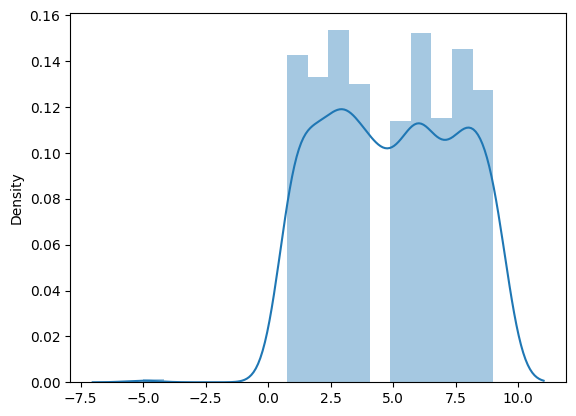

In [ ]:
sns.distplot(x=X_train.DriverMood_Score)

<Axes: xlabel='Lap', ylabel='DriverMood_Score'>

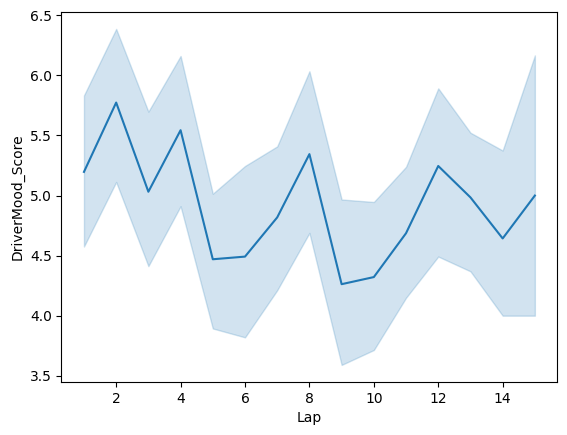

In [ ]:
sns.lineplot(x=X_train.Lap, y=X_train.DriverMood_Score)

In [ ]:
X_train.DriverMood_Score.describe()

,DriverMood_Score
count,886.000000
mean,4.924379
std,2.617614
min,-5.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,9.000000


In [ ]:
# very low values
mask5 = X_train.DriverMood_Score < X_train.DriverMood_Score.mean() - 3 * X_train.DriverMood_Score.std()
X_train[mask5]

,Lap,Time_s,AmbientTemp_C,EngineSpeed_RPM,VehicleSpeed_kph,FuelLoad_kg,CoolingSetting,ERS_Deploy,AirflowRate_kgps,Throttle_pct,BrakePressure_bar,OilPressure_bar,Weather_Humidity_pct,TyreWear_Index,DriverMood_Score,EngineLoad_Index,RollingAmbient_C
134,6,485,20.54,11811.0,174.8,20.76,low,0.0,0.818,93.4,59.9,4.747148,59.4,49.5,-5.0,1130.6,20.56


In [ ]:
# remove very low values
X_train = X_train.drop(X_train[mask5].index)
X_train = X_train.reset_index(drop=True)

# remove the same rows from y_train
y_train = y_train.drop(y_train[mask5].index)
y_train = y_train.reset_index(drop=True)

In [ ]:
# the values are within range
# replace null values with the mean
DriverMood_Score_mode = X_train.DriverMood_Score.mode()[0]
X_train['DriverMood_Score'] = X_train['DriverMood_Score'].fillna(DriverMood_Score_mode)
X_test['DriverMood_Score'] = X_test['DriverMood_Score'].fillna(DriverMood_Score_mode)

/tmp/ipython-input-307138645.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train.EngineLoad_Index)


<Axes: ylabel='Density'>

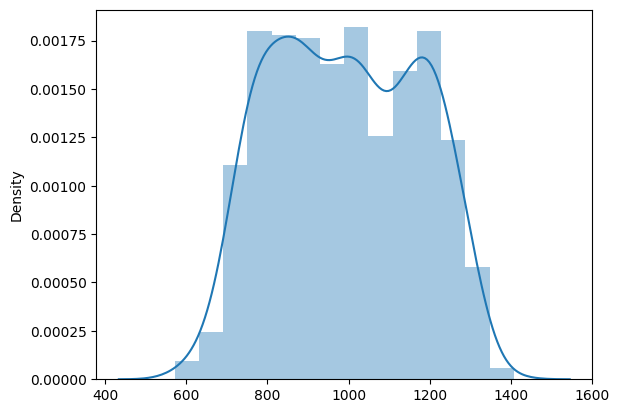

In [ ]:
# EngineLoad_Index
sns.distplot(x=X_train.EngineLoad_Index)

<Axes: xlabel='Lap', ylabel='EngineLoad_Index'>

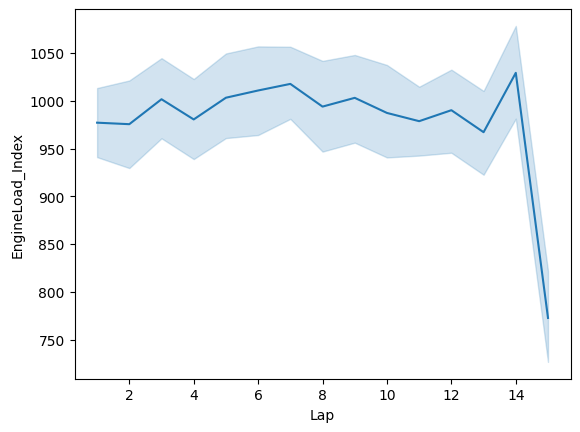

In [ ]:
sns.lineplot(x=X_train.Lap, y=X_train.EngineLoad_Index)

In [ ]:
X_train.EngineLoad_Index.describe()

,EngineLoad_Index
count,894.000000
mean,992.124609
std,178.830652
min,571.600000
25%,841.475000
50%,987.400000
75%,1149.350000
max,1406.900000


In [ ]:
# there are no outliers
# fill null values with mean
EngineLoad_Index_mean = X_train.EngineLoad_Index.mean()
X_train['EngineLoad_Index'] = X_train['EngineLoad_Index'].fillna(EngineLoad_Index_mean)
X_test['EngineLoad_Index'] = X_test['EngineLoad_Index'].fillna(EngineLoad_Index_mean)

<Axes: xlabel='Lap', ylabel='RollingAmbient_C'>

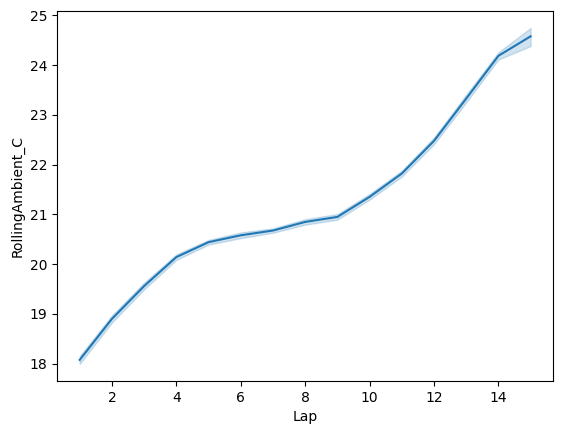

In [ ]:
# RollingAmbient_C
sns.lineplot(x=X_train.Lap, y=X_train.RollingAmbient_C)

/tmp/ipython-input-3716186832.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train.RollingAmbient_C)


<Axes: ylabel='Density'>

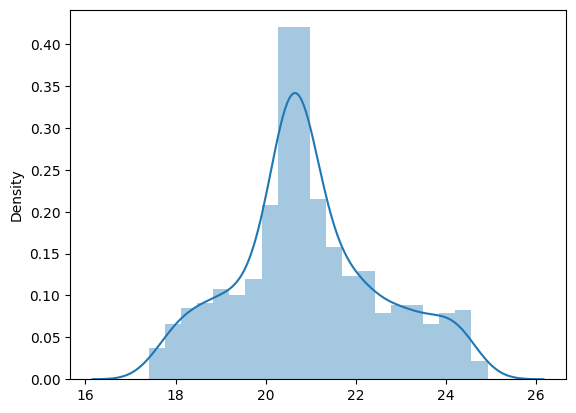

In [ ]:
sns.distplot(x=X_train.RollingAmbient_C)

In [ ]:
X_train.RollingAmbient_C.describe()

,RollingAmbient_C
count,883.000000
mean,20.948698
std,1.607847
min,17.400000
25%,20.120000
50%,20.740000
75%,21.860000
max,24.930000


In [ ]:
# no outliers
# fill in with mean
RollingAmbient_C_mean = X_train.RollingAmbient_C.mean()
X_train['RollingAmbient_C'] = X_train['RollingAmbient_C'].fillna(RollingAmbient_C_mean)
X_test['RollingAmbient_C'] = X_test['RollingAmbient_C'].fillna(RollingAmbient_C_mean)

<Axes: xlabel='Lap', ylabel='RollingAmbient_C'>

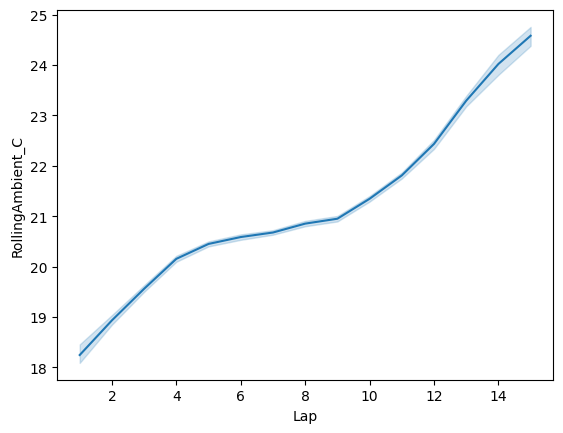

In [ ]:
sns.lineplot(x=X_train.Lap, y=X_train.RollingAmbient_C)

In [ ]:
X_train.isnull().sum()

,0
Lap,0
Time_s,0
AmbientTemp_C,0
EngineSpeed_RPM,0
VehicleSpeed_kph,0
FuelLoad_kg,0
CoolingSetting,0
ERS_Deploy,0
AirflowRate_kgps,0
Throttle_pct,0


In [ ]:
X_train

,Lap,Time_s,AmbientTemp_C,EngineSpeed_RPM,VehicleSpeed_kph,FuelLoad_kg,CoolingSetting,ERS_Deploy,AirflowRate_kgps,Throttle_pct,BrakePressure_bar,OilPressure_bar,Weather_Humidity_pct,TyreWear_Index,DriverMood_Score,EngineLoad_Index,RollingAmbient_C
0,6,519,20.42,11681.0,170.200000,20.28,low,0.0,0.779,94.8,71.3,4.80,61.7,60.0,9.0,1213.5,20.33
1,4,357,20.17,9707.0,146.200000,22.56,low,0.0,0.671,81.4,64.3,4.39,61.0,45.9,6.0,805.9,20.43
2,5,474,20.70,12080.0,173.400000,20.89,low,0.0,0.779,90.1,61.6,4.73,65.3,45.4,2.0,1080.1,20.27
3,13,1211,23.92,9607.0,148.000000,9.88,high,0.0,0.880,81.9,83.0,4.45,54.6,48.9,1.0,739.5,23.80
4,7,643,20.86,9667.0,137.800000,18.33,med,0.0,0.661,70.2,77.0,4.51,65.0,44.6,2.0,785.0,20.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,4,291,20.04,11360.0,162.900000,23.64,low,1.0,0.757,89.2,69.2,4.73,58.8,41.6,1.0,982.9,19.85
898,5,414,20.33,12429.0,165.266292,21.75,low,0.0,0.794,85.5,67.3,4.95,57.6,43.4,2.0,987.1,20.57
899,13,1142,23.12,10880.0,158.000000,10.94,high,0.0,0.944,69.4,73.9,4.81,66.8,63.6,7.0,762.5,22.93
900,2,125,18.69,12832.0,191.700000,26.16,low,1.0,0.864,100.0,48.9,5.03,54.9,38.6,7.0,1303.3,18.64


### Variable Encoding





In [ ]:
X_train.dtypes

,0
Lap,int64
Time_s,int64
AmbientTemp_C,float64
EngineSpeed_RPM,float64
VehicleSpeed_kph,float64
FuelLoad_kg,float64
CoolingSetting,object
ERS_Deploy,float64
AirflowRate_kgps,float64
Throttle_pct,float64


In [ ]:
# encoding the CoolingSetting feature using an ordinal encoder to keep the order
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['low', 'med', 'high']])
X_train['CoolingSetting'] = encoder.fit_transform(X_train[['CoolingSetting']])
X_test['CoolingSetting'] = encoder.fit_transform(X_test[['CoolingSetting']])

In [ ]:
# convert categorical columns to int64 is better for some models
# ERS Deploy is a boolean {0,1}
X_train['ERS_Deploy'] = X_train['ERS_Deploy'].astype('int32')
X_test['ERS_Deploy'] = X_test['ERS_Deploy'].astype('int32')
# CoolingSetting is {0,1,2}
X_train['CoolingSetting'] = X_train['CoolingSetting'].astype('int32')
X_test['CoolingSetting'] = X_test['CoolingSetting'].astype('int32')
# DriverMood_Score is {1-9}
X_train['DriverMood_Score'] = X_train['DriverMood_Score'].astype('int32')
X_test['DriverMood_Score'] = X_test['DriverMood_Score'].astype('int32')


In [ ]:
X_train.dtypes

,0
Lap,int64
Time_s,int64
AmbientTemp_C,float64
EngineSpeed_RPM,float64
VehicleSpeed_kph,float64
FuelLoad_kg,float64
CoolingSetting,int32
ERS_Deploy,int32
AirflowRate_kgps,float64
Throttle_pct,float64


In [ ]:
# dropping the time and Lap features since they are irrelevant to our analysis
X_train = X_train.drop(['Time_s', 'Lap'], axis=1)
X_test = X_test.drop(['Time_s', 'Lap'], axis=1)
X_train

,AmbientTemp_C,EngineSpeed_RPM,VehicleSpeed_kph,FuelLoad_kg,CoolingSetting,ERS_Deploy,AirflowRate_kgps,Throttle_pct,BrakePressure_bar,OilPressure_bar,Weather_Humidity_pct,TyreWear_Index,DriverMood_Score,EngineLoad_Index,RollingAmbient_C
0,20.42,11681.0,170.200000,20.28,0,0,0.779,94.8,71.3,4.80,61.7,60.0,9,1213.5,20.33
1,20.17,9707.0,146.200000,22.56,0,0,0.671,81.4,64.3,4.39,61.0,45.9,6,805.9,20.43
2,20.70,12080.0,173.400000,20.89,0,0,0.779,90.1,61.6,4.73,65.3,45.4,2,1080.1,20.27
3,23.92,9607.0,148.000000,9.88,2,0,0.880,81.9,83.0,4.45,54.6,48.9,1,739.5,23.80
4,20.86,9667.0,137.800000,18.33,1,0,0.661,70.2,77.0,4.51,65.0,44.6,2,785.0,20.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,20.04,11360.0,162.900000,23.64,0,1,0.757,89.2,69.2,4.73,58.8,41.6,1,982.9,19.85
898,20.33,12429.0,165.266292,21.75,0,0,0.794,85.5,67.3,4.95,57.6,43.4,2,987.1,20.57
899,23.12,10880.0,158.000000,10.94,2,0,0.944,69.4,73.9,4.81,66.8,63.6,7,762.5,22.93
900,18.69,12832.0,191.700000,26.16,0,1,0.864,100.0,48.9,5.03,54.9,38.6,7,1303.3,18.64


In [ ]:
X_train.shape

(902, 15)

In [ ]:
y_train.shape

(902,)

## 2. Feature Selection
In this experiment L1 regularization (Lasso regression) method with cross-vlidation s chosen for feature selection for the following reasons:
1.  **Dimension reduction**: Lasso shrinks the coefficients of some features until , eliminating the non-important ones.
2. **Multicollinearity**: Data has correlated features as we saw earlier and some of them need to be eliminated. Lasso will help choose the one that contributes more to the prediction.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error

In [ ]:
# setting the cross-vaidation to use 5 folds
lasso_selector_model = LassoCV(alphas=None, cv=5, max_iter=5000, n_alphas=100, random_state=42)

In [ ]:
# The pipeline will execute these steps in order:
# 1. 'scaler': scale the data
# 2. 'feature_selection': fit the LassoCV model and select features with non-zero coefficients.
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso_cv', lasso_selector_model),
])

In [ ]:
# fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso_cv', LassoCV(cv=5, max_iter=5000, random_state=42))])

In [ ]:
# Best alpha found
best_alpha = pipeline.named_steps['lasso_cv'].alpha_
print("Best alpha:", best_alpha)

Best alpha: 0.045115212868626464


In [ ]:
# Coefficients
coefs = pipeline.named_steps['lasso_cv'].coef_
coef_df = pd.Series(coefs, index=X_train.columns).sort_values(key=abs, ascending=False)

In [ ]:
print("Top coefficients:\n", coef_df.head(15))

Top coefficients:
 EngineSpeed_RPM         1.805078
FuelLoad_kg             0.746170
Throttle_pct            0.290692
CoolingSetting         -0.271693
OilPressure_bar         0.157217
DriverMood_Score        0.108514
Weather_Humidity_pct    0.080870
AmbientTemp_C          -0.077380
ERS_Deploy              0.021153
VehicleSpeed_kph        0.017661
AirflowRate_kgps        0.000000
BrakePressure_bar      -0.000000
TyreWear_Index          0.000000
EngineLoad_Index       -0.000000
RollingAmbient_C       -0.000000
dtype: float64


In [ ]:
# Feature selection: non-zero coefficients
selected_features = coef_df[coef_df != 0].index.tolist()
print("Selected features (non-zero):", selected_features)

Selected features (non-zero): ['EngineSpeed_RPM', 'FuelLoad_kg', 'Throttle_pct', 'CoolingSetting', 'OilPressure_bar', 'DriverMood_Score', 'Weather_Humidity_pct', 'AmbientTemp_C', 'ERS_Deploy', 'VehicleSpeed_kph']


In [ ]:
# take only the selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

## 3. Model Training and Cross-Validation

In [ ]:
# 1. scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

linreg_model = LinearRegression()
# the result is returned as a negative value
lin_reg_scores = cross_val_score(linreg_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
# convert the negative MSE back to positive MSE, and then calculates RMSE.
lin_reg_rmse_scores = np.sqrt(-lin_reg_scores)
print(f"Cross-Validation RMSE: {np.mean(lin_reg_rmse_scores):.4f} (+/- {np.std(lin_reg_rmse_scores):.4f})")

Cross-Validation RMSE: 3.0589 (+/- 0.2277)


### Polynomial Regression
This is a type of linear model that can fit non-linear relationships.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Degree 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_linreg_model = LinearRegression()
X_train_poly = poly_features.fit_transform(X_train_scaled)

poly_scores = cross_val_score(poly_linreg_model, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
poly_rmse_scores = np.sqrt(-poly_scores)
print(f"Cross-Validation RMSE: {np.mean(poly_rmse_scores):.4f} (+/- {np.std(poly_rmse_scores):.4f})")

Cross-Validation RMSE: 3.1040 (+/- 0.2799)


### Decision Tree (DT)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
dt_rmse_scores = np.sqrt(-dt_scores)
print(f"Cross-Validation RMSE: {np.mean(dt_rmse_scores):.4f} (+/- {np.std(dt_rmse_scores):.4f})")

Cross-Validation RMSE: 2.6981 (+/- 0.1347)


### Random Forest (RF)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rf_rmse_scores = np.sqrt(-rf_scores)
print(f"Cross-Validation RMSE: {np.mean(rf_rmse_scores):.4f} (+/- {np.std(rf_rmse_scores):.4f})")

Cross-Validation RMSE: 2.0452 (+/- 0.1137)


### Support Vector Regressor (SVR)



In [ ]:
from sklearn.svm import SVR

svr_model = SVR()
svr_scores = cross_val_score(svr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
svr_rmse_scores = np.sqrt(-svr_scores)
print(f"Cross-Validation RMSE: {np.mean(svr_rmse_scores):.4f} (+/- {np.std(svr_rmse_scores):.4f})")

Cross-Validation RMSE: 2.9574 (+/- 0.2634)


### K-Nearest Neighbors (KNN)

Try for K in {5, 7, 10, 12}



In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# K = 5
knn_5_model = KNeighborsRegressor(n_neighbors=5)
knn_5_scores = cross_val_score(knn_5_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
knn_5_rmse_scores = np.sqrt(-knn_5_scores)
print(f"Cross-Validation RMSE: {np.mean(knn_5_rmse_scores):.4f} (+/- {np.std(knn_5_rmse_scores):.4f})")

Cross-Validation RMSE: 3.0147 (+/- 0.2862)


In [ ]:
# K = 7
knn_7_model = KNeighborsRegressor(n_neighbors=7)
knn_7_scores = cross_val_score(knn_7_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
knn_7_rmse_scores = np.sqrt(-knn_7_scores)
print(f"Cross-Validation RMSE: {np.mean(knn_7_rmse_scores):.4f} (+/- {np.std(knn_7_rmse_scores):.4f})")

Cross-Validation RMSE: 2.9993 (+/- 0.2522)


In [ ]:
# K = 10
knn_10_model = KNeighborsRegressor(n_neighbors=10)
knn_10_scores = cross_val_score(knn_10_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
knn_10_rmse_scores = np.sqrt(-knn_10_scores)
print(f"Cross-Validation RMSE: {np.mean(knn_10_rmse_scores):.4f} (+/- {np.std(knn_10_rmse_scores):.4f})")

Cross-Validation RMSE: 2.9723 (+/- 0.2765)


In [ ]:
# K = 12
knn_12_model = KNeighborsRegressor(n_neighbors=12)
knn_12_scores = cross_val_score(knn_12_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
knn_12_rmse_scores = np.sqrt(-knn_12_scores)
print(f"Cross-Validation RMSE: {np.mean(knn_12_rmse_scores):.4f} (+/- {np.std(knn_12_rmse_scores):.4f})")

Cross-Validation RMSE: 2.9775 (+/- 0.2647)


### Prediction and Validation

We pick the model with the best performance on the training set, we train it again on the entire training dataset and we use it for prediction.
The metrics we will be measuring are:
1. MAE (Mean Absolute Error): Needs to be as small as possible (ideally 0). It represents the average absolute error.

2. MSE (Mean Squared Error): Needs to be as small as possible (ideally 0). It heavily penalizes large errors.

3. RMSE (Root Mean Squared Error): Needs to be as small as possible (ideally 0). It's in the original unit of the target variable.

4. R2 (R-squared): Needs to be as close to 1 as possible. This metric measures the proportion of the variance in the target variable that is predictable from the features.

    * R2=1.0 means a perfect fit (100% of variance explained).

    * R2=0.0 means the model is no better than simply predicting the mean of the data.

    * R2<0.0 means the model is performing worse than the average.*italicized text*

In [ ]:
# The best model was Random Forest with the lowest RMSE of 2.0452 (+/- 0.1137)

best_model = RandomForestRegressor(random_state=42)

# fit the best model on the entire training dataset (scaled)
best_model.fit(X_train_scaled, y_train)

# make predictions on the test data (scaled)
y_pred = best_model.predict(X_test_scaled)

# calculate validation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Absolute Error (MAE): 1.7134
Mean Squared Error (MSE): 4.8612
Root Mean Squared Error (RMSE): 2.2048
R-squared (R2): 0.7066


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)

# define the model and the hyperparameter search space
model = RandomForestRegressor(random_state=42)

# define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2']
}


# perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=10,  # number of different parameter combinations to try
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# fit the search to your training data
random_search.fit(X_train, y_train)


# get the best parameters and the best model
best_params = random_search.best_params_
print(f"Best Hyperparameters found: {best_params}")

best_model_optimized = random_search.best_estimator_

# make predictions on the test data using the best model
y_pred_opt = best_model_optimized.predict(X_test)

# evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred_opt)
mse = mean_squared_error(y_test, y_pred_opt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_opt)

print("-" * 30)
print("Model Evaluation on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters found: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}
------------------------------
Model Evaluation on Test Set:
Mean Absolute Error (MAE): 1.7375
Mean Squared Error (MSE): 5.0289
Root Mean Squared Error (RMSE): 2.2425
R-squared (R2) Score: 0.6965


In [ ]:
# negligeable improvements for so much more computational power.

## Prediction Results Interpretation
* Rsquared = 0.7066
    * The model explains ≈70.7% of the temperature variance, which is a strong result.
* Mean Absolute Error (MAE): 1.7134C
    * The model's average prediction is off by 1.71C.
* Root Mean Squared Error (RMSE): 2.2048C
    * The typical prediction error is 2.20C. Since this is much lower than the data's standard deviation (3.98C), the predictions are meaningful.


### Extra Segment

It would be interesting to investigate what our missing values could have been.


Let's try to predict their valuesusing the model we built.

In [ ]:
X_unknown = missing_target[selected_features]

In [ ]:
# filling in any missing values in the features
X_unknown['EngineSpeed_RPM'] = X_unknown['EngineSpeed_RPM'].fillna(EngineSpeed_RPM_mean)
X_unknown['FuelLoad_kg'] = X_unknown['FuelLoad_kg'].fillna(FuelLoad_kg_mean)
X_unknown['Throttle_pct'] = X_unknown['Throttle_pct'].fillna(Throttle_pct_mean)
X_unknown['CoolingSetting'] = X_unknown['CoolingSetting'].fillna(CoolingSetting_mode)
X_unknown['OilPressure_bar'] = X_unknown['OilPressure_bar'].fillna(OilPressure_bar_mean)
X_unknown['DriverMood_Score'] = X_unknown['DriverMood_Score'].fillna(DriverMood_Score_mode)
X_unknown['Weather_Humidity_pct'] = X_unknown['Weather_Humidity_pct'].fillna(Weather_Humidity_pct_median)
X_unknown['AmbientTemp_C'] = X_unknown['AmbientTemp_C'].fillna(AmbientTemp_C_mean)
X_unknown['ERS_Deploy'] = X_unknown['ERS_Deploy'].fillna(ERS_Deploy_mode)
X_unknown['VehicleSpeed_kph'] = X_unknown['VehicleSpeed_kph'].fillna(VehicleSpeed_kph_mean)

In [ ]:
# encoding the CoolingSetting feature using an ordinal encoder to keep the order
X_unknown['CoolingSetting'] = encoder.fit_transform(X_unknown[['CoolingSetting']])

/tmp/ipython-input-2884875997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_unknown['CoolingSetting'] = encoder.fit_transform(X_unknown[['CoolingSetting']])


In [ ]:
# convert categorical columns to int64 is better for some models
X_unknown['ERS_Deploy'] = X_unknown['ERS_Deploy'].astype('int32')
X_unknown['CoolingSetting'] = X_unknown['CoolingSetting'].astype('int32')
X_unknown['DriverMood_Score'] = X_unknown['DriverMood_Score'].astype('int32')


In [ ]:
# scaling the data
X_unknown_scaled = scaler.transform(X_unknown)

In [ ]:
# making predictions
y_unk_pred = best_model.predict(X_unknown)

In [ ]:
# will not be able to verify the true va;ues but it is good practice to see
# what the values could be
y_unk_pred

array([92.1845, 92.1845, 92.2373, 92.1845, 92.1845, 92.1845, 92.2373,
       92.1845, 92.1845, 92.2373, 92.1589, 92.2373, 92.2117, 92.1845,
       92.2117, 92.1845, 92.1845, 92.1845, 92.1845, 92.1845, 92.1845,
       92.2373, 92.2373, 92.2117, 92.1845])